In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
X=load_breast_cancer()['data']
y=load_breast_cancer()['target']
feature_names=load_breast_cancer()['target_names']

X.shape[1]

30

In [3]:
df = pd.DataFrame(X) 
df['Target']=y
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

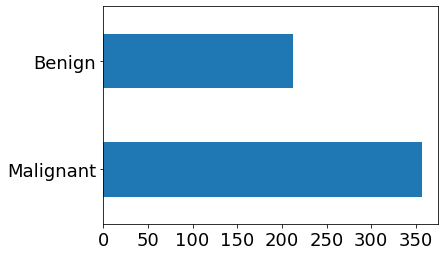

In [4]:
df['Target'].value_counts().rename(index = {0:"Benign", 1:"Malignant"}).plot.barh(fontsize = 18)

In [5]:
X_scaled=MinMaxScaler().fit_transform(X)
print(X_scaled.shape[1])
#df2=pd.DataFrame(X_scaled)
#df2

30


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33,random_state=42)
#test set is 1/3rd of x and training set is 2/3rd of x
print("Training examples: ",X_train.shape[0],"\n","Testing examples: ",X_test.shape[0])


Training examples:  381 
 Testing examples:  188


30

In [7]:
X_train

array([[0.4012968 , 0.07372337, 0.40570797, ..., 0.62783505, 0.32544845,
        0.30145612],
       [0.27776989, 0.39431857, 0.26839887, ..., 0.19247423, 0.18194362,
        0.17361931],
       [0.57877798, 0.299628  , 0.56464653, ..., 0.7185567 , 0.38872462,
        0.18299882],
       ...,
       [0.34592267, 0.2404464 , 0.32140142, ..., 0.11453608, 0.17602996,
        0.04040404],
       [0.33125089, 0.33513696, 0.32706793, ..., 0.62783505, 0.31815494,
        0.33097206],
       [0.24605992, 0.36557322, 0.23101375, ..., 0.25536082, 0.22255076,
        0.090122  ]])

In [222]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z)) 

In [223]:
def hypo(X,weights):
    y_pred= Sigmoid(np.matmul(X,weights))
    return y_pred

In [224]:
def cost(y,y_pred):
    return (((np.matmul(np.transpose(-y),np.log(y_pred)))-(np.matmul(np.transpose(1-y),np.log(1-y_pred))))/(y.shape[0]))[0]


In [225]:
def gradient_descent_step(w,X,y,y_pred,alpha):
    w=w-alpha*(np.matmul(np.transpose(X),(y_pred-y)))/(y.shape[0])
  #  print(((np.matmul(np.transpose(X),(y_pred-y))).shape))
    return w

In [226]:
def train(X,y,iterations=50,alpha=0.1):
    #reshape y to 381,1(it is currently (381,) )
    y=np.reshape(y,(y.shape[0],1))
    #have a list of costs to use to plot cost function
    costs=[]
    #initialise weights to a column np array of size=(number of examples)
    weights=np.ones((X.shape[1],1))
    
    for i in range(iterations):
        #calculate y_pred using hypo()
        y_pred=hypo(X,weights)
       # print("Shape of y_pred and y",y_pred.shape,y.shape)
        
        #calculate costi(cost at ith iteration)
        
        costi=cost(y,y_pred)
        costs.append(costi)
        
        #update weights using gradient descent
        weights=gradient_descent_step(weights,X,y,y_pred,alpha)
        
        if(4*(i+1))%iterations==0:
            print("cost after %i %% iterations: %f"%((i+1)*100/iterations,costi))

    return weights,costs

cost after 25 % iterations: 0.140021
cost after 50 % iterations: 0.114271
cost after 75 % iterations: 0.101647
cost after 100 % iterations: 0.093767


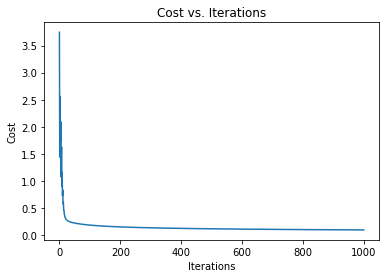

In [256]:
wf, c = train(X_train, y_train, iterations = 1000, alpha=10) # you can tweak the parameters here
#cost=0.093767 for i=1000 and alpha=10
plt.plot(range(len(c)), c)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()



In [269]:
def predict(X,weights):
    y_pred= hypo(X,weights)
    y_pred=np.where(y_pred>0.5,y_pred/y_pred,y_pred*0)
    return y_pred

In [281]:
def accuracy(y,y_pred):
    y_pred=y_pred.ravel()
    right=0
    for i in y:
        if y_pred[i]==y[i]:
            right+=1
    return right*100/y.shape[0]

In [282]:
pred_train = predict(X_train, wf)
pred_test = predict(X_test, wf)

In [288]:
print("Accuracy for train data: ", accuracy(y_train, pred_train))
print("Accuracy for test data: ", accuracy(y_test, pred_test))

Accuracy for train data:  100.0
Accuracy for test data:  100.0
